In [213]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu, levene, shapiro, skew
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest
import math
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import copy
from sklearn.preprocessing import LabelEncoder

In [3]:
insure = pd.read_csv("insurance (2).csv")

In [4]:
insure.head()
insure.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

### How to find whether a dtype is categorical or not?
1. Is it strong, object? A non-numerical ? - If yes, it is most probably categorical. Howeber there are exceptions. Month in a year can be both string and number. When in number is can be treated as categorical or assumed to be continious.
2. If a int or float - it is most probably a continious variable.

In [5]:
insure.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
print("5 point summary of age is (min, max, mean, std, median)      ", insure.age.min(), insure.age.max(), insure.age.mean(), insure.age.std(), insure.age.median())
print("5 point summary of BMI is (min, max, mean, std, median)      ", insure.bmi.min(), insure.bmi.max(), insure.bmi.mean(), insure.bmi.std(), insure.bmi.median())
print("5 point summary of children is (min, max, mean, std, median) ", insure.children.min(), insure.children.max(), insure.children.mean(), insure.children.std(), insure.children.median())
print("5 point summary of charges is (min, max, mean, std, median)  ", insure.charges.min(), insure.charges.max(), insure.charges.mean(), insure.charges.std(), insure.charges.median())


5 point summary of age is (min, max, mean, std, median)       18 64 39.20702541106129 14.049960379216172 39.0
5 point summary of BMI is (min, max, mean, std, median)       15.96 53.13 30.663396860986538 6.098186911679017 30.4
5 point summary of children is (min, max, mean, std, median)  0 5 1.0949177877429 1.2054927397819095 1.0
5 point summary of charges is (min, max, mean, std, median)   1121.8739 63770.42801 13270.422265141257 12110.011236693994 9382.033


In [7]:
print("5 point summary of age is (min, max, mean, std, median)      ", insure.age.describe())
print("5 point summary of BMI is (min, max, mean, std, median)      ", insure.bmi.describe())
print("5 point summary of children is (min, max, mean, std, median) ", insure.children.describe())
print("5 point summary of charges is (min, max, mean, std, median)  ", insure.charges.describe())

5 point summary of age is (min, max, mean, std, median)       count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
5 point summary of BMI is (min, max, mean, std, median)       count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
5 point summary of children is (min, max, mean, std, median)  count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
5 point summary of charges is (min, max, mean, std, median)   count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63

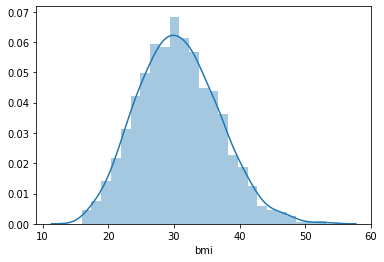

In [43]:
sns.distplot(insure.bmi)

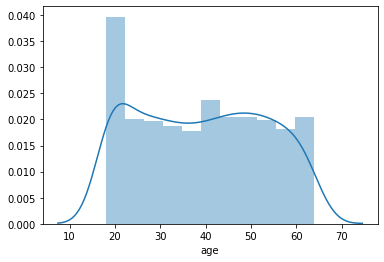

In [44]:
sns.distplot(insure.age)

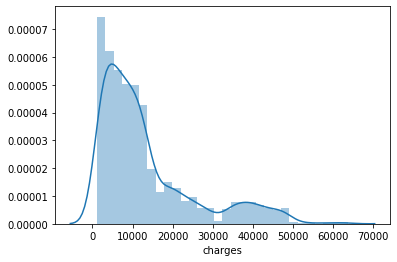

In [45]:
sns.distplot(insure.charges)

In [53]:
print ("Skew for BMI is", skew(insure.bmi))
print ("Skew for age is", skew(insure.age))
print ("Skew for charges is", skew(insure.charges))

Skew for BMI is 0.28372857291709386
Skew for age is 0.055610083072599126
Skew for charges is 1.5141797118745743


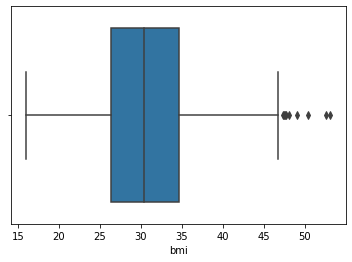

In [57]:
sns.boxplot(insure.bmi)

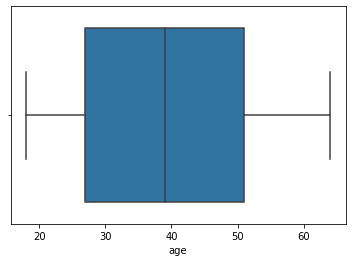

In [58]:
sns.boxplot(insure.age)

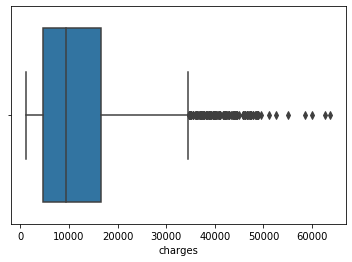

In [59]:
sns.boxplot(insure.charges)

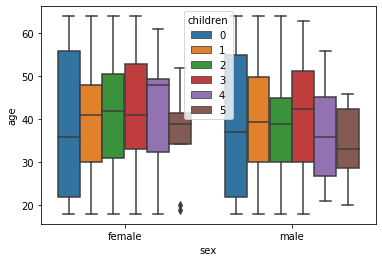

In [69]:
sns.boxplot(insure.sex, insure.age, hue=insure.children)

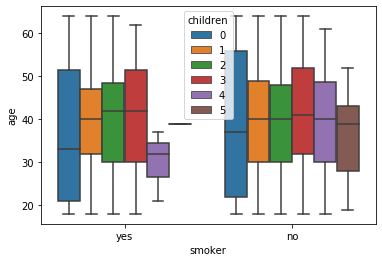

In [71]:
sns.boxplot(insure.smoker, insure.age, hue=insure.children)

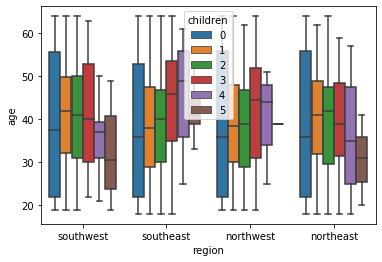

In [73]:
sns.boxplot(insure.region, insure.age, hue=insure.children)

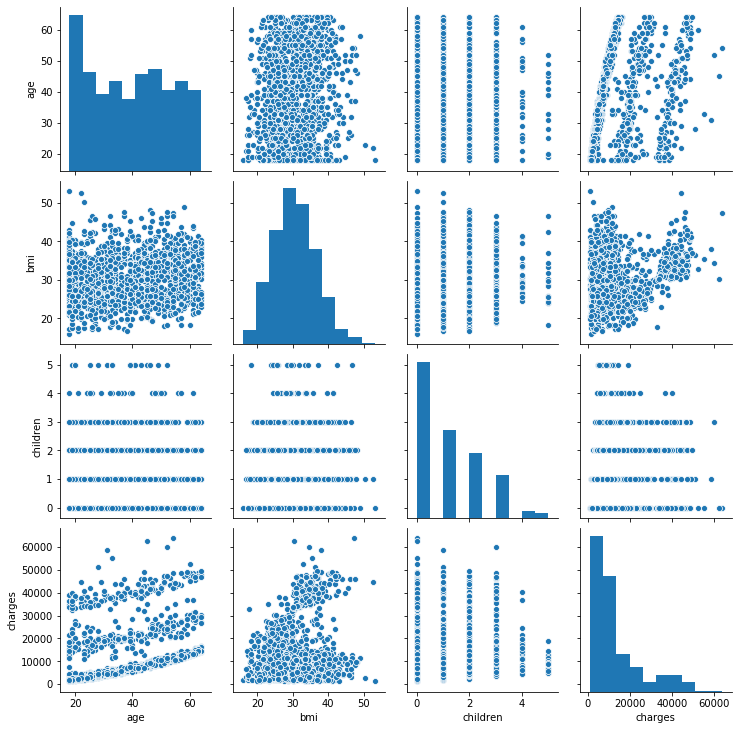

In [211]:
sns.pairplot(insure)

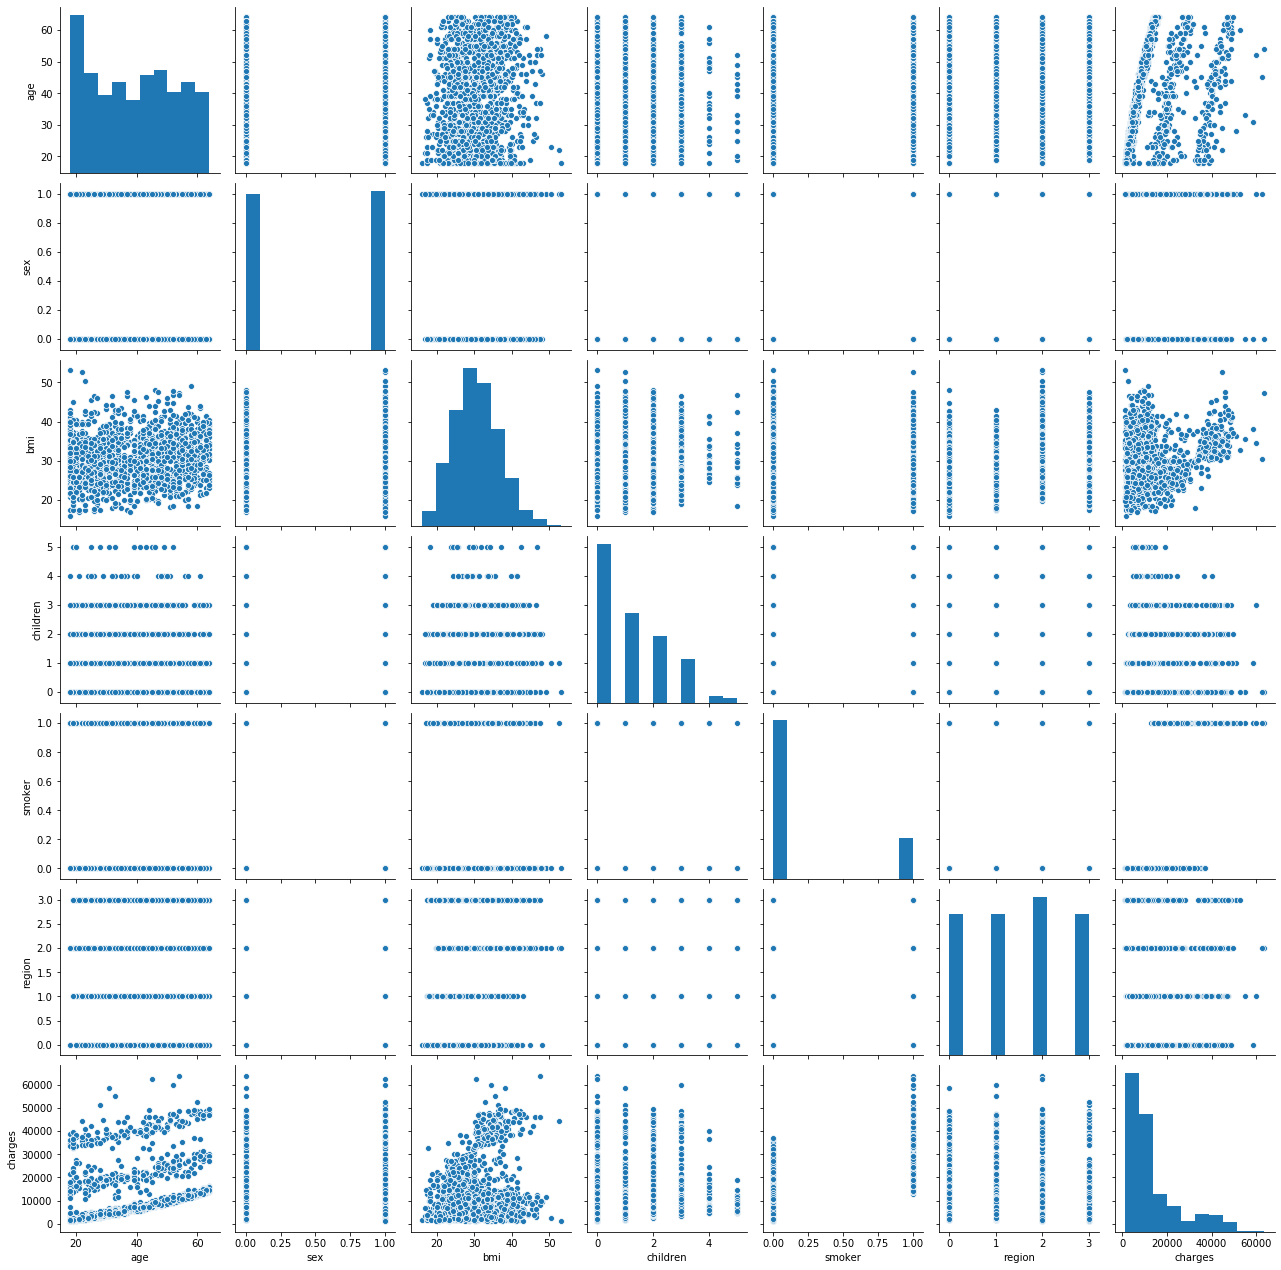

In [218]:
cp_insure = copy.deepcopy(insure)
cp_insure.loc[:,['sex', 'smoker', 'region']] = cp_insure.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)
sns.pairplot(cp_insure)

## Do smokers pay a premium over non-smokers? ##
Do charges of people who smoke differ significantly from the
people who don't

### filter charges for non smokers ####

In [38]:
insure_nonsmoke = insure.charges[insure["smoker"]=="no"]
insure_nonsmoke.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

### filter charges for smokers ####

In [26]:
insure_smoke = insure.charges[insure["smoker"]=="yes"]
insure_smoke.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [43]:
print(insure_smoke.shape)
print(insure_nonsmoke.shape)

(274,)
(1064,)
16884.924
1725.5523


### find 2 sample t stat ####

In [96]:
smoke_stat, p_value = ttest_ind(insure_smoke, insure_nonsmoke)
##p_value = 5
print("T stat for the comparison is ", smoke_stat, " and associated p-value is", p_value)
if p_value < 0.05 :
    print("Null hypothesis rejected, the p-value is less than significance level of 5%, there is a ", smoke_stat, "standard deviation difference between smokers and nonsmokers")
    print("Smokers pay a premium over non-smokers")
else :
    print("Alternate hypothesis rejected, the p-value is more than significance level of 5%, there is a ", smoke_stat, "standard deviation difference between smokers and nonsmokers")
    print("There is statistically non significant difference between charges paid by Smokers  non-smokers")


T stat for the comparison is  46.664921172723716  and associated p-value is 8.271435842177219e-283
Null hypothesis rejected, the p-value is less than significance level of 5%, there is a  46.664921172723716 standard deviation difference between smokers and nonsmokers
Smokers pay a premium over non-smokers


## Are males bulkier than females? ##
Does bmi of males differ significantly from that of females?

In [98]:
#insure_male = insure.bmi[insure["sex"] == "male"]
insure_male = insure.bmi[insure.sex == "male"]
insure_male.shape

(676,)

In [99]:
insure_female = insure.bmi[insure.sex == "female"]
insure_female.shape

(662,)

### Find t-stat for male and female ###
HO = there is no difference between BMI of men and women
HA = There is a significant difference between BMI of men and women

In [100]:
comp_bmi, bmi_p_value = ttest_ind(insure_male, insure_female)
print("T-stat for comparison of male and female is", comp_bmi, "the p-value is ", bmi_p_value)
if bmi_p_value <0.05 :
    print("Null Hyposthesis rejected. There is a significant different between BMI of men and women.")
    print("There is a ", comp_bmi, "difference in standard deviation difference in BMI. This is less than the significance of 5% with p_value of", bmi_p_value)
else:
    print("Alternate Hyposthesis rejected. There is NOT a statistically significant different between BMI of men and women.")
    print("There is a ", comp_bmi, "difference in standard deviation difference in BMI. This is more than the significance of 5% with p_value of", bmi_p_value)



T-stat for comparison of male and female is 1.696752635752224 the p-value is  0.08997637178984932
Alternate Hyposthesis rejected. There is NOT a statistically significant different between BMI of men and women.
There is a  1.696752635752224 difference in standard deviation difference in BMI. This is more than the significance of 5% with p_value of 0.08997637178984932


## Are there more male smokers than female smokers? ##
Is the proportion of smokers significantly different in different
genders?

We are comparing proportions. z-test is the right choice here.
h0 - Proportations are equal. Similar smoking habits in male and female
hA - Proportions arent equal. different smoking habits in male and female.


In [101]:
# //extract smoker columns for male and female 
male_count = insure.sex.value_counts()[0]
female_count = insure.sex.value_counts()[1]
#insure[insure.sex == "male"].value_counts()
print(male_count)
print(female_count)
male_smoke_count = insure[insure.sex == "male"].smoker.value_counts()[1]
print(male_smoke_count)
female_smoke_count = insure[insure.sex == "female"].smoker.value_counts()[1]
print(female_smoke_count)
#insure_male.shape

676
662
159
115


In [111]:
z_stat, z_pval = proportions_ztest([male_smoke_count, female_smoke_count] , [male_count, female_count])
##z_pval = 0.06
if z_pval < 0.05:
    print("Null hypothesis rejected!")
    print("The proportion of men who are smokers is DIFFERENT from proportion of women who are smokers.")
    print("The p value is ", round(z_pval,3), "z stat is ", z_stat)
else:
    print("Alternate hypothesis rejected!")
    print("The proportion of men who are smokers is SIMILAR/SAME as the proportion of women who are smokers.")
    print("The p value is ", round(z_pval,3), "z stat is ", z_stat)



Null hypothesis rejected!
The proportion of men who are smokers is DIFFERENT from proportion of women who are smokers.
The p value is  0.005 z stat is  2.7867402154855503


## Is the BMI of women with 0,1, 2 children same? ##
Is the distribution of bmi across women with no children, one child
and two children, the same?
H0 = The BMI is more less similar
HA = BMI is significantly different
Alpha = 5%

We need to use Anova - one-way. we are comparing difference between the three or more samples/groups of a single independent variable i.e. BMI.

In [168]:
female_count = insure.sex.value_counts()[1]
male_smoke_count = insure[insure.sex == "female"].smoker.value_counts()[1]
#print(male_smoke_count)
female_smoke_count = insure[insure.sex == "female"].smoker.value_counts()[1]
#print(female_smoke_count)
#insure_male.shape

f1_bmi = insure[(insure.children < 3)]
#print(f1_bmi[f1_bmi.children == 0])
f1_bmi = f1_bmi[["children", "bmi"]]

print(f1_bmi)


      children     bmi
0            0  27.900
1            1  33.770
3            0  22.705
4            0  28.880
5            0  25.740
...        ...     ...
1331         0  33.400
1334         0  31.920
1335         0  36.850
1336         0  25.800
1337         0  29.070

[1138 rows x 2 columns]


In [210]:
mod = ols('children ~ bmi', data = f1_bmi).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
print(aov_table.iloc[0,3])
if aov_table.iloc[0,3] < 0.05 :
    print("Null hypothesis rejected!")
    print("With p-value of ", aov_table.iloc[0,3], "There a significant difference between BMI of women with 0, 1 and 2 children")

else :
    print("Alternate hypothesis rejected!")
    print("With p-value of ", aov_table.iloc[0,3], "There isnt a significant difference between BMI of women with 0, 1 and 2 children")



    

              sum_sq      df         F    PR(>F)
bmi         0.453237     1.0  0.719586  0.396458
Residual  715.518643  1136.0       NaN       NaN
0.3964582934955261
Alternate hypothesis rejected!
With p-value of  0.3964582934955261 There isnt a significant difference between BMI of women with 0, 1 and 2 children


Since the p-value it 39% and it is much higher than 5%. We reject alternate hypothesis. There is nosignificant proof that the BMI is very different between women with 0,1,2 children.